<a href="https://colab.research.google.com/github/gachet/000mis-colabs/blob/master/soluciones_minimos_cuad_prob10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 10.- El precio de un determinado producto varía con los años que está en el mercado, tal y como se muestra en la tabla siguiente:


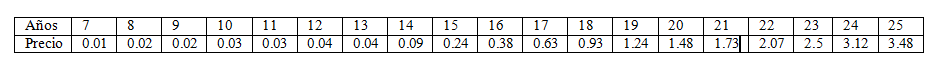

In [0]:
from IPython.display import Image
Image(filename="tablas/diez.png")

#### Ajustar a estos datos los siguientes modelos utilizando mínimos cuadrados y ver cuál es el que mejor se ajusta  (x son loa años y el precio es la y).
1. $y =  c_{1}e^{c_{2}x}$
2. $ y = c_{1}*x^{c_{2}}$
3. $ y= c_{1}x^{2}+c_{2}x+c_{3}$
4. $ y= c_{1}x^{4}+c_{2}x^{3}+c_{3}x{2}+c_{4}x+c_{5}$

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
input_data=np.loadtxt('productos.dat',skiprows=2)

In [0]:
x_orig=np.array(input_data[:,0])
y_orig=np.array(input_data[:,1])
unos = np.ones(len(x_orig))
x = x_orig.reshape(-1,1)
y = y_orig.reshape(-1,1)
unos = unos.reshape(-1,1)
print('vector X  vector Y')
for i in range(0,len(x)):
    print('%4.3f\t'%(x[i]),'%4.2f'%(y[i]))

vector X  vector Y
7.000	 0.01
8.000	 0.02
9.000	 0.02
10.000	 0.03
11.000	 0.03
12.000	 0.04
13.000	 0.04
14.000	 0.09
15.000	 0.24
16.000	 0.38
17.000	 0.63
18.000	 0.93
19.000	 1.24
20.000	 1.48
21.000	 1.73
22.000	 2.07
23.000	 2.50
24.000	 3.12
25.000	 3.48


### 1.- Primer intento  $ F(x)=y =  c_{1}e^{c_{2}x}$ la ecuación lineal es de la forma $v = \alpha*x+\beta$ siendo $v=\ln y\,\,\, \alpha = c_2, \,\,\,\beta=\ln c_1$

In [0]:
A = np.column_stack((x,np.ones(len(x))))
print('Matriz A \n',A)

Matriz A 
 [[ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [14.  1.]
 [15.  1.]
 [16.  1.]
 [17.  1.]
 [18.  1.]
 [19.  1.]
 [20.  1.]
 [21.  1.]
 [22.  1.]
 [23.  1.]
 [24.  1.]
 [25.  1.]]


In [0]:
v=np.log(y)
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [0.35601117] [-7.06635534]
Coeficientes  c1 y c2 son  
 [0.00085334] [0.35601117]


## Ecuación es &nbsp;&nbsp;&nbsp;&nbsp;   $precio = 0.00085334*e^{0.356*años} $ 

In [0]:
y_calc = c1*np.e **(c2*x)
print('vector y_calc es\n',y_calc)

vector y_calc es
 [[0.01031375]
 [0.01472415]
 [0.02102055]
 [0.03000943]
 [0.04284217]
 [0.06116248]
 [0.087317  ]
 [0.12465579]
 [0.17796154]
 [0.25406208]
 [0.36270499]
 [0.51780616]
 [0.73923224]
 [1.05534532]
 [1.50663577]
 [2.15090862]
 [3.07068767]
 [4.38378586]
 [6.25839568]]


In [0]:
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

10.395000586584228

In [0]:
alfa = c[0]
beta = c[1]
v=np.log(y)
v_calc= alfa*x+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.961097784125807


### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1- \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
v = np.log(y)
r = v - np.dot(A,c)
R2=1 - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9610977841258082


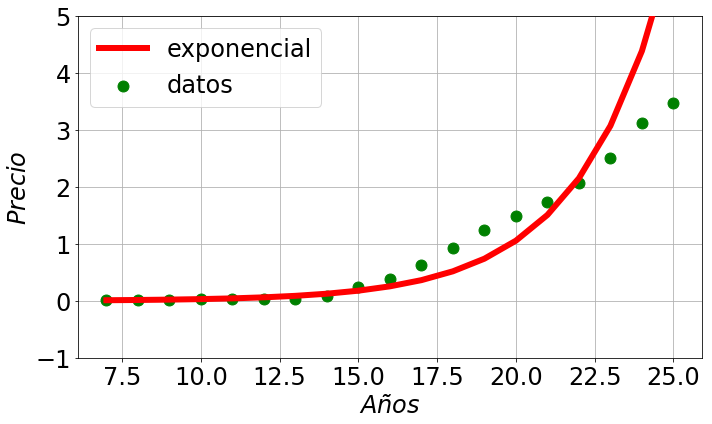

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
bottom, top = -01.,5.0  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precio$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


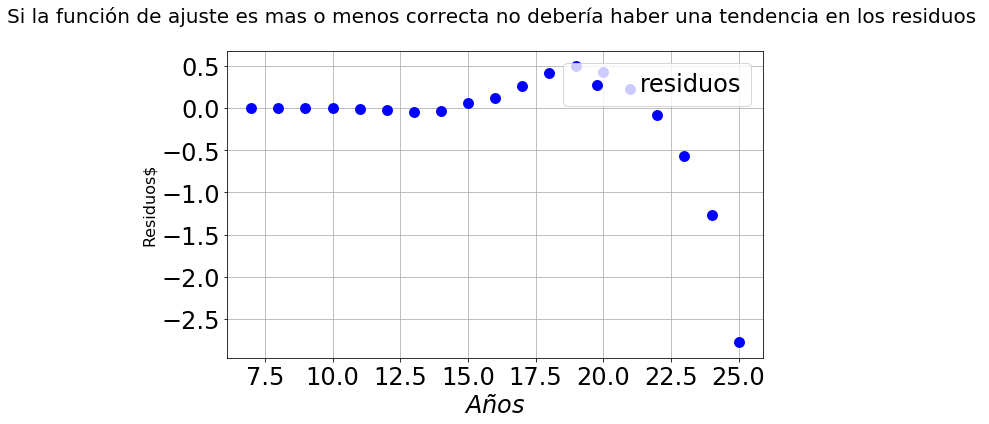

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 1.- Segundo Intento  $ y = c_{1}*x^{c_{2}}$

### ecuación lineal &nbsp;&nbsp;$\rightarrow v=\alpha*u+\beta$&nbsp;&nbsp; Siendo &nbsp;&nbsp;  $v=\ln(y) \,\,\, u=\ln(x),\,\,\, \alpha=c_2, \,\,\,\beta =\ln(c1)$



In [0]:
u = np.log(x)
v= np.log(y)

In [0]:
A = np.column_stack((u,np.ones(len(u))))
print('Matriz A\n',A)

Matriz A
 [[1.94591015 1.        ]
 [2.07944154 1.        ]
 [2.19722458 1.        ]
 [2.30258509 1.        ]
 [2.39789527 1.        ]
 [2.48490665 1.        ]
 [2.56494936 1.        ]
 [2.63905733 1.        ]
 [2.7080502  1.        ]
 [2.77258872 1.        ]
 [2.83321334 1.        ]
 [2.89037176 1.        ]
 [2.94443898 1.        ]
 [2.99573227 1.        ]
 [3.04452244 1.        ]
 [3.09104245 1.        ]
 [3.13549422 1.        ]
 [3.17805383 1.        ]
 [3.21887582 1.        ]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,v))
print('Vector  c \n',c)

Vector  c 
 [[  5.14715248]
 [-15.30117618]]


In [0]:
alfa = c[0]
beta = c[1]
print('Coeficientes  \u03B1 y \u03B2 \n',alfa,beta)
c1 = np.e**beta
c2 = alfa
print('Coeficientes  c1 y c2 son  \n',c1,c2)

Coeficientes  α y β 
 [5.14715248] [-15.30117618]
Coeficientes  c1 y c2 son  
 [2.26351626e-07] [5.14715248]


###  Ecuación   $ precio = 2.26351626E-07*años^{5.14715248}$

In [0]:
y_calc = c1*x **(c2)
suma_cuad_err= np.sum((y-y_calc)**2)
suma_cuad_err         

0.6141830727859995

In [0]:
alfa = c[0]
beta = c[1]
v= np.log(y)
v_calc= alfa*np.log(x)+beta
R2 = np.sum((v_calc-np.mean(v))**2)/np.sum((v-np.mean(v))**2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9476364147277271


In [0]:
v = np.log(y)
r = v - np.dot(A,c)
R2=1 - (np.linalg.norm(r)**2 / np.sum((v - np.mean(v)) ** 2))
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.947636414727745


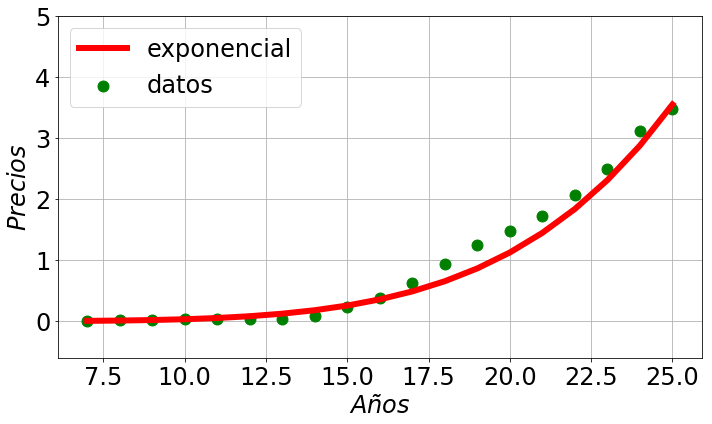

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
bottom, top = -0.6,5.0  # return the current ylim
plt.ylim((bottom, top))   # set the ylim to bottom, top
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='exponencial',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precios$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


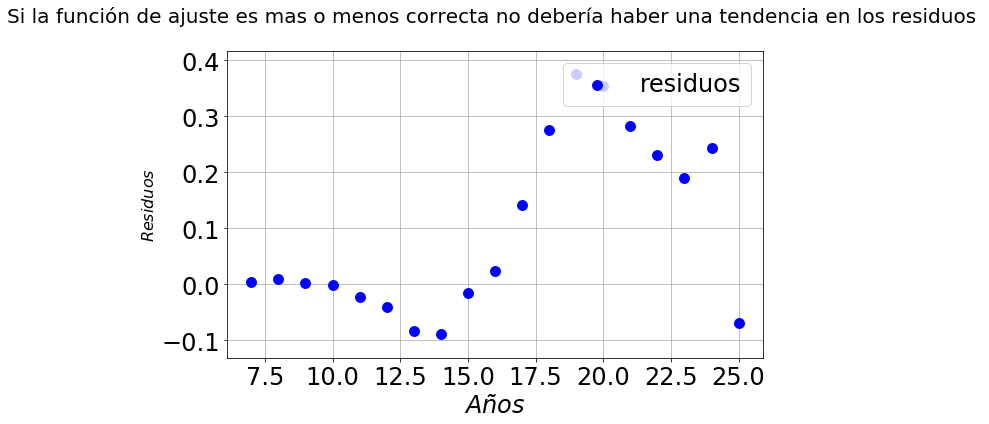

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
#bottom, top = -0.2,0.2  # return the current ylim
#plt.ylim((bottom, top))   # set the ylim to bottom, top
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,(y-y_calc),s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Residuos$',fontsize=16)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 3.- Tercer modelo $ y= c_{1}x^{2}+c_{2}x+c_{3}$

In [0]:
A = np.column_stack((x**2,x,unos))
print('Matriz A\n',A)

Matriz A
 [[ 49.   7.   1.]
 [ 64.   8.   1.]
 [ 81.   9.   1.]
 [100.  10.   1.]
 [121.  11.   1.]
 [144.  12.   1.]
 [169.  13.   1.]
 [196.  14.   1.]
 [225.  15.   1.]
 [256.  16.   1.]
 [289.  17.   1.]
 [324.  18.   1.]
 [361.  19.   1.]
 [400.  20.   1.]
 [441.  21.   1.]
 [484.  22.   1.]
 [529.  23.   1.]
 [576.  24.   1.]
 [625.  25.   1.]]


In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [[ 0.01659443]
 [-0.34582869]
 [ 1.73883179]]


### Ecuacion es &nbsp;&nbsp;&nbsp;&nbsp; $precio = 0.01659años^{2}-0.3458años+1.7$

In [0]:
c1 = c[0]
c2 = c[1]
c3 = c[2]

y_calc = c1*x**2+c2*x+c3
suma_errores = np.sum((y-y_calc)**2)
suma_errores

0.0891439422084624

### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
r = y - np.dot(A,c)
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9954234018526483


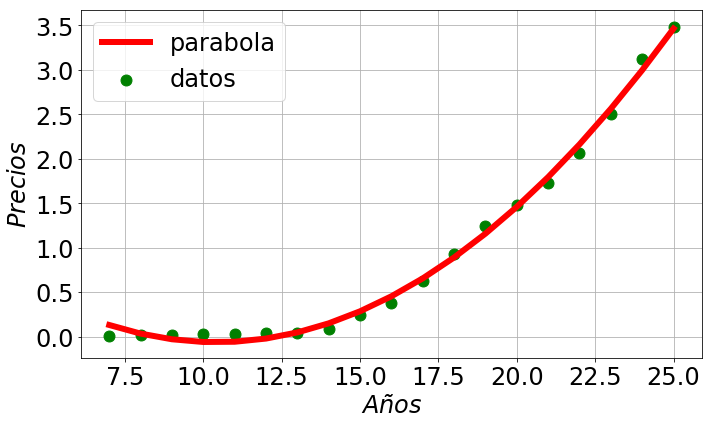

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='parabola',zorder=4)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precios$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


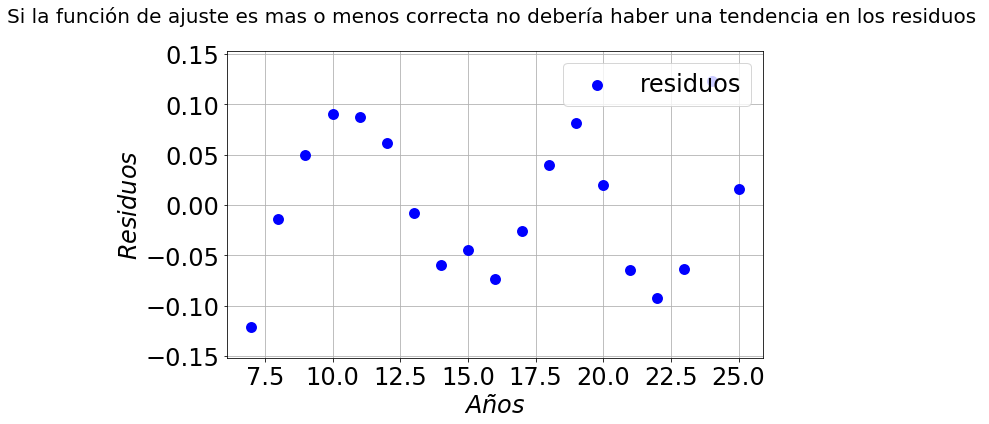

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,r,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Residuos$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper right',fontsize=24)
plt.tight_layout()
plt.show()

### 4.- Cuarto modelo $ y= c_{1}x^{4}+c_{2}x^{3}+c_{3}x{2}+c_{4}x+c_{5}$

In [0]:
A = np.column_stack((x**4,x**3,x**2,x,unos))
print('Matriz A\n',A)

Matriz A
 [[2.40100e+03 3.43000e+02 4.90000e+01 7.00000e+00 1.00000e+00]
 [4.09600e+03 5.12000e+02 6.40000e+01 8.00000e+00 1.00000e+00]
 [6.56100e+03 7.29000e+02 8.10000e+01 9.00000e+00 1.00000e+00]
 [1.00000e+04 1.00000e+03 1.00000e+02 1.00000e+01 1.00000e+00]
 [1.46410e+04 1.33100e+03 1.21000e+02 1.10000e+01 1.00000e+00]
 [2.07360e+04 1.72800e+03 1.44000e+02 1.20000e+01 1.00000e+00]
 [2.85610e+04 2.19700e+03 1.69000e+02 1.30000e+01 1.00000e+00]
 [3.84160e+04 2.74400e+03 1.96000e+02 1.40000e+01 1.00000e+00]
 [5.06250e+04 3.37500e+03 2.25000e+02 1.50000e+01 1.00000e+00]
 [6.55360e+04 4.09600e+03 2.56000e+02 1.60000e+01 1.00000e+00]
 [8.35210e+04 4.91300e+03 2.89000e+02 1.70000e+01 1.00000e+00]
 [1.04976e+05 5.83200e+03 3.24000e+02 1.80000e+01 1.00000e+00]
 [1.30321e+05 6.85900e+03 3.61000e+02 1.90000e+01 1.00000e+00]
 [1.60000e+05 8.00000e+03 4.00000e+02 2.00000e+01 1.00000e+00]
 [1.94481e+05 9.26100e+03 4.41000e+02 2.10000e+01 1.00000e+00]
 [2.34256e+05 1.06480e+04 4.84000e+02 2.20000

In [0]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [[-3.64766252e-05]
 [ 2.57280029e-03]
 [-4.80840339e-02]
 [ 3.32784134e-01]
 [-7.33707624e-01]]


### Ecuacion es &nbsp;&nbsp;&nbsp;&nbsp; $precio = -3.647E-05años^{4}+ 2.5728E-03años^{3}-4.8084 E-02años^{2}+ 0.3327años-0.733$

In [0]:
c1 = c[0]
c2 = c[1]
c3 = c[2]
c4 = c[3]
c5 = c[4]

y_calc = c1*x**4+c2*x**3+c3*x**2+c4*x+c5
suma_errores = np.sum((y-y_calc)**2)
suma_errores

0.06276510644199446

### El coeficiente de determinación se puede calcular también como:
$$
R^{2}=1-\left( \frac{m-1}{m-n-1} \right) \frac{\parallel r \parallel_{2}^{2}}{\displaystyle\sum_{i=1}^{m}\left(y_{i}-\bar{y}\right)^{2}}
$$

In [0]:
r = y - np.dot(A,c)
m,n = A.shape[0],A.shape[1]

R2=1 - ((m-1)/(m-n-1))*np.linalg.norm(r)**2 / np.sum ((y - np.mean(y))** 2)
print('Coeficiente de determinación es: ',R2)

Coeficiente de determinación es:  0.9962819337758981


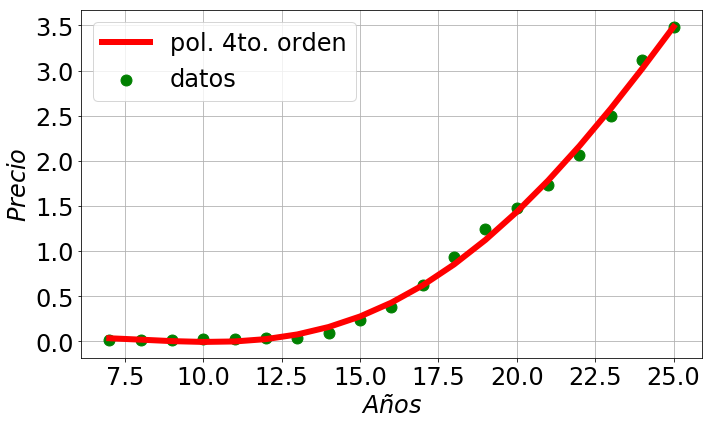

In [0]:
plt.figure(figsize = (10,6) )
plt.grid(True)

# plot data as scatter plot,
plt.scatter(x,y,s=120,c='green',label='datos',zorder=2)
# plot best fit
plt.plot(x,y_calc,c='red',linewidth=6,label='pol. 4to. orden',zorder=4)
#valores_x=np.arange(7,30)
#valores_y= c1*valores_x**4+c2*valores_x**3+c3*valores_x**2+c4*valores_x+c5
#plt.plot(valores_x,valores_y,c='red',linewidth=6,label='pol. 4to. orden',zorder=4)
#plt.yticks(np.arange(0, 5, step=0.01))
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('$Precio$',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()


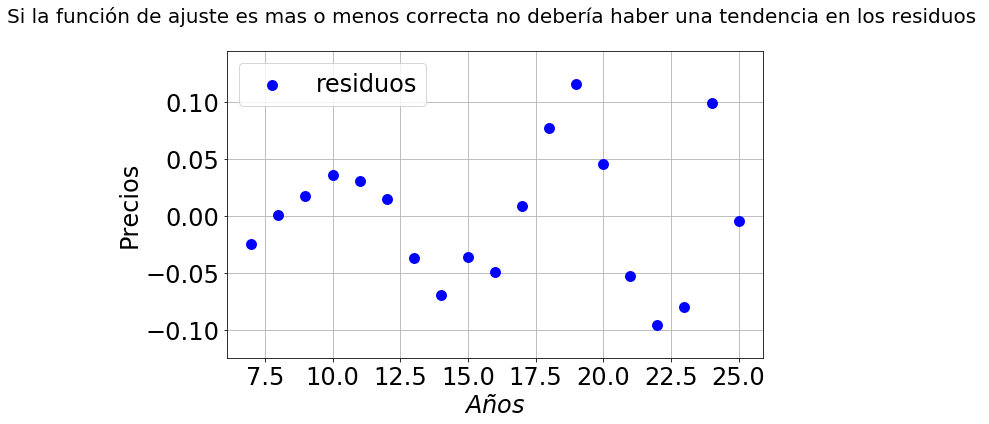

In [0]:
## plot errors to look for trend
######### Now generate plot
plt.figure(figsize = (12,6) )
plt.grid(True)
# plot data as scatter plot,
plt.title('Si la función de ajuste es mas o menos correcta no debería haber una tendencia en los residuos \n',fontsize=20)
# these are the error or residuals in y values
plt.scatter(x,r,s=120,c='blue',linewidth=0,label='residuos',zorder=2)
plt.xlabel('$Años$',fontsize=24)
plt.ylabel('Precios',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left',fontsize=24)
plt.tight_layout()
plt.show()